This notebook is designed to give some insight into what the convolutions of a CNN "see".  This is baed on chapter 8 of Deep Learning with PyTorch https://githum.com/deep-learning-with-pytorch/dlwpt-code/tree/master/p1ch8.

A key feature of convolutions is their ablity serve as feature extractors.  This example is a quick demonstration of that. You'll extract the first convolution layer from a trained model, in this case a MobileNetV3 model, and apply it to and image and then look at the output.

In [1]:
!pip3 install torch torchvision torchaudio matplotlib pillow numpy

You should consider upgrading via the '/Users/rdejana/Development/Git/working/cnn/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np
import collections

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms
from PIL import Image


from torchvision import models
import torch.nn as nn

So we'll loop through the model, looking for an instance of a nn.Conv2d.  Once we find it, we'll break.
Take note of its attributes, e.g. kernel size, stride, and padding.

In [3]:
myModel = models.mobilenet_v3_large(pretrained=True)
myConv2d = None

for name, module in myModel.named_modules():
    if isinstance(module, nn.Conv2d):
        print(name, module.kernel_size)
        myConv2d = module
        # print(r)
        # print(module.weight)
        break
myConv2d

features.0.0 (3, 3)


Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)

If you want to play with your own values, here is how you can create your own Conv2d.  Note, the following as assigned, not learned weights.

In [4]:

conv = nn.Conv2d(3, 16, kernel_size=3,stride=3) # <1>
with torch.no_grad():
    conv.bias.zero_()

with torch.no_grad():
    conv.weight.fill_(1.0 / 9.0)

conv

Conv2d(3, 16, kernel_size=(3, 3), stride=(3, 3))

The following methods transform our input image. preprocess resizes the image, transforms it to a PyTorch tensor and normalizes the values. preprocess2 simply transforms the image to a tensor.

In [9]:
# resize, convert to tensor, and normalize
preprocess = transforms.Compose([
        transforms.Resize(256),
        # transforms.CenterCrop(224), # uncomment if you want to center crop
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )])

# convert to tensor
preprocess2 = transforms.Compose([
        # transforms.Resize(256),
        # transforms.CenterCrop(224),
        transforms.ToTensor()
        ])

# helper function to display the results of the convolution.
def display_image(out):
    print(len(out[0]))
    for x in range(len(out[0])):
          plt.imshow(out[0, x].detach(),cmap='gray')
          plt.show()

(720, 1280, 3)


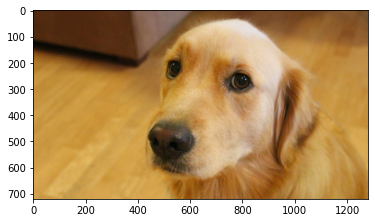

torch.Size([3, 256, 455])
torch.Size([3, 720, 1280])


In [10]:
fileName = "data/bobby.jpeg"
# img = imageio.imread(fileName)
img = Image.open(fileName)

print(np.shape(img))
plt.imshow(img)
plt.show()

img_t = preprocess(img)
img_t2 = preprocess2(img)


print(img_t.shape)
print(img_t2.shape)

Apply the convolution and notice the dimensions of the output tensors.  How do they compare to the original tensors?

In [11]:
output = myConv2d(img_t.unsqueeze(0))
output2 = myConv2d(img_t2.unsqueeze(0))

print(output.shape)
print(output2.shape)

torch.Size([1, 16, 128, 228])
torch.Size([1, 16, 360, 640])


Display the the output image.

16


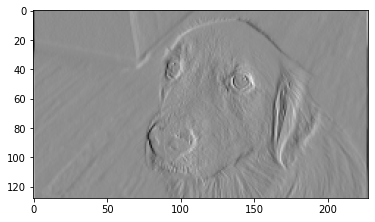

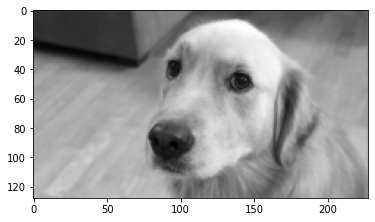

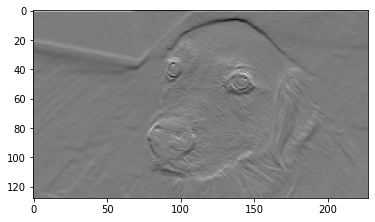

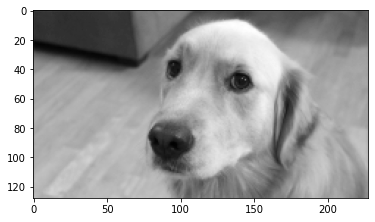

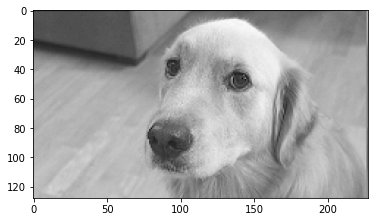

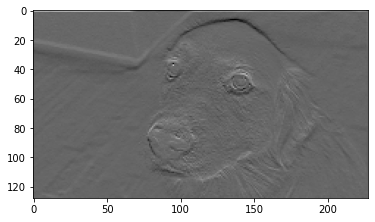

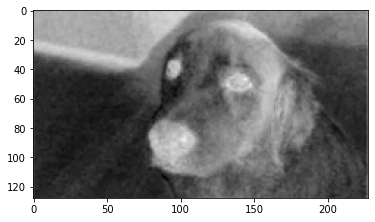

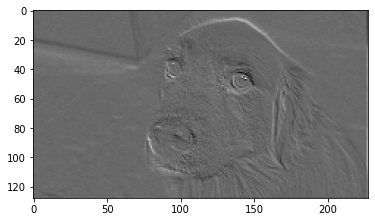

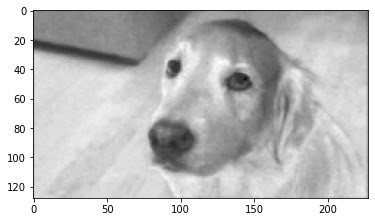

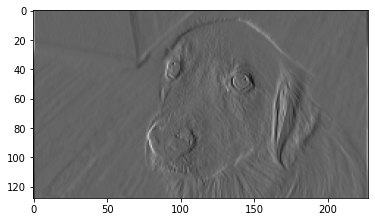

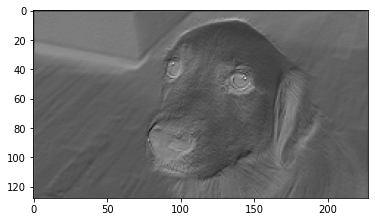

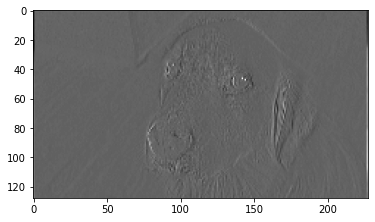

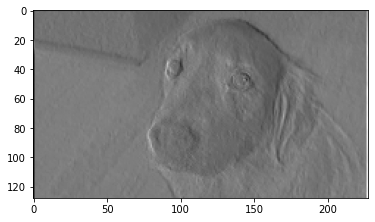

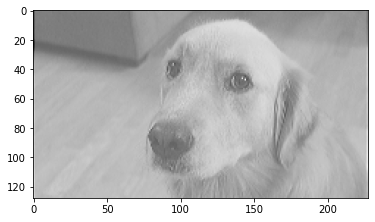

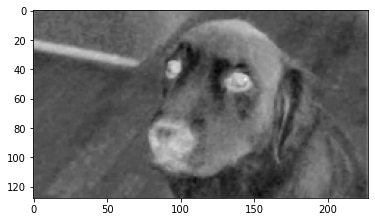

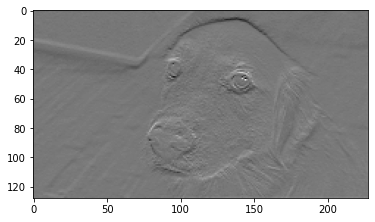

In [12]:
# display output; you can replace with output2 to see the full size image.
display_image(output)


What do you see?